# Modeling


In [96]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [97]:
db_all = pd.read_csv('data/analysis_ready.csv.gz')
db_all['l_price'] = np.log(db_all['price_cleansed'])

In [98]:
xs = ['l_price', 'bedrooms', 'bathrooms', 'beds', 'room_type']
db = db_all[xs].dropna()
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53509 entries, 0 to 53903
Data columns (total 5 columns):
l_price      53509 non-null float64
bedrooms     53509 non-null float64
bathrooms    53509 non-null float64
beds         53509 non-null float64
room_type    53509 non-null object
dtypes: float64(4), object(1)
memory usage: 2.4+ MB


## Baseline model

$$
\log(P) = \alpha + X \beta + \epsilon
$$

$X$:

- Bathrooms
- Bedrooms
- Beds
- Room type

In [99]:
m1 = sm.ols('l_price ~ bedrooms + bathrooms + beds', db).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                l_price   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     8823.
Date:                Wed, 28 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:29:03   Log-Likelihood:                -46041.
No. Observations:               53509   AIC:                         9.209e+04
Df Residuals:                   53505   BIC:                         9.213e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6139      0.006    573.011      0.000       3.602       3.626
bedrooms       0.2914      0.005     63.625      0.000       0.282       0.300
bathrooms      0.0255      0.005      4.699      0.000       0.015       0.036
beds           0.1466      0.003     47.363      0.000       0.141       0.153
==============================================================================
Omnibus:                     1229.914   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2834.743
Skew:                           0.040   Prob(JB):                         0.00
Kurtosis:                       4.125   Cond. No.                         9.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To note:

- Decent $R^2$ (although that's not holy truth)
- Every variable significant and related as expected
- Interpret coefficients

In [100]:
cols = ['bedrooms', 'bathrooms', 'beds']
scX = pd.DataFrame(scale(db[cols]),
                   index=db.index,
                   columns=cols)
m2 = sm.ols('l_price ~ bedrooms + bathrooms + beds', 
            data=scX.join(db['l_price']))\
       .fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                l_price   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     8823.
Date:                Wed, 28 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:29:03   Log-Likelihood:                -46041.
No. Observations:               53509   AIC:                         9.209e+04
Df Residuals:                   53505   BIC:                         9.213e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2917      0.002   1735.312      0.000       4.287       4.297
bedrooms       0.2458      0.004     63.625      0.000       0.238       0.253
bathrooms      0.0140      0.003      4.699      0.000       0.008       0.020
beds           0.1762      0.004     47.363      0.000       0.169       0.184
==============================================================================
Omnibus:                     1229.914   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2834.743
Skew:                           0.040   Prob(JB):                         0.00
Kurtosis:                       4.125   Cond. No.                         2.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To note:

How does interpretation of the coefficients change?
* Meaning of intecept when $X$ is demeanded
* Units in which $\beta$ are interpreted

## Predictive checking

Is the model picking up the overall "shape of data"?

- Important to know how much we should trust our inferences
- Crucial if we want to use the model to predict!

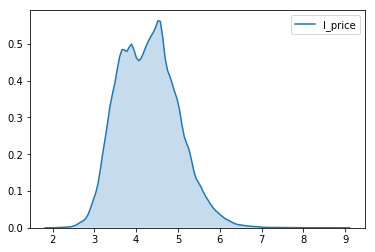

In [101]:
sns.kdeplot(db['l_price'], shade=True)

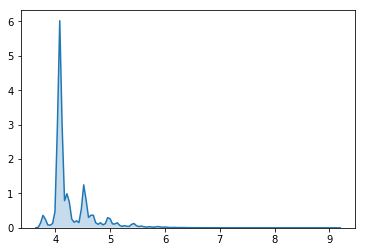

In [102]:
sns.kdeplot(m1.fittedvalues, shade=True)

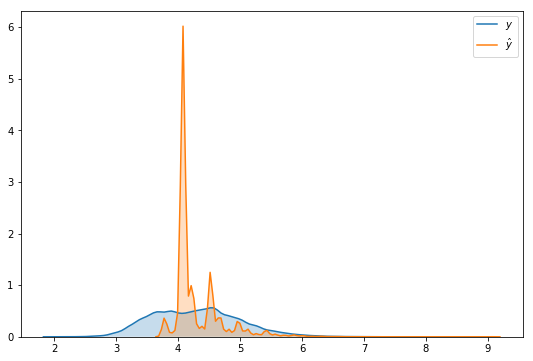

In [103]:
f, ax = plt.subplots(1, figsize=(9, 6))
sns.kdeplot(db['l_price'], shade=True, ax=ax, label='$y$')
sns.kdeplot(m1.fittedvalues, shade=True, ax=ax, label='$\hat{y}$')
plt.show()

To note:

- Not a terrible start
- How could we improve it?

In [104]:
m3 = sm.ols('l_price ~ bedrooms + bathrooms + beds + room_type', db).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                l_price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                 1.630e+04
Date:                Wed, 28 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:29:05   Log-Likelihood:                -32031.
No. Observations:               53509   AIC:                         6.407e+04
Df Residuals:                   53503   BIC:                         6.413e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.2139      0.006    724.314      0.000       4.203       4.225
room_type[T.Private room]    -0.7901      0.004   -184.073      0.000      -0.799      -0.782
room_type[T.Shared room]     -1.3001      0.017    -76.812      0.000      -1.333      -1.267
bedrooms                      0.1757      0.004     49.030      0.000       0.169       0.183
bathrooms                     0.1211      0.004     28.774      0.000       0.113       0.129
beds                          0.0491      0.002     19.925      0.000       0.044       0.054
==============================================================================
Omnibus:                     7192.898   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28913.080
Skew:                           0.628   Prob(JB):                         0.00
Kurtosis:                       6.375   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

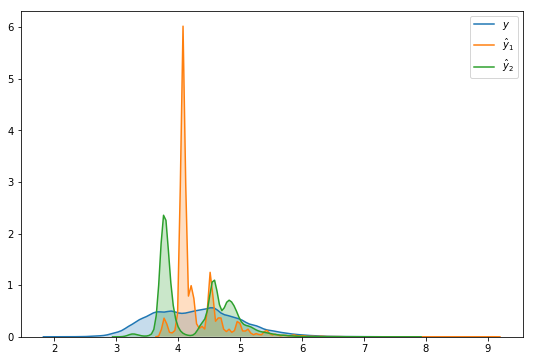

In [105]:
f, ax = plt.subplots(1, figsize=(9, 6))
sns.kdeplot(db['l_price'], shade=True, ax=ax, label='$y$')
sns.kdeplot(m1.fittedvalues, shade=True, ax=ax, label='$\hat{y}_1$')
sns.kdeplot(m3.fittedvalues, shade=True, ax=ax, label='$\hat{y}_2$')
plt.show()

To note:

- This is better!
- But these are only point predictions. Sometimes that's good enough.
- Usually however, we want a model to capture the underlying process instead of the particular realisation observed (ie. dataset).
- Then we need to think about the uncertainty embedded in the model we are estimating

## Inferential Vs Predictive uncertainty

[See more in Chapter 7.2 of [Gelman & Hill 2006](http://www.stat.columbia.edu/~gelman/arm/)]

- Two types of uncertainty in our model
    + Predictive ($\epsilon$)
    + Inferential ($\beta$)
- Both affect the final predictions we make

![](../figs/d3s2_example.png)

In [106]:
db_all.loc[db_all['id']==7849135, :].T

,38951
review_scores_rating,96
review_scores_accuracy,10
review_scores_cleanliness,10
review_scores_checkin,10
review_scores_communication,10
review_scores_location,10
review_scores_value,9
id,7849135
last_scraped,2017-03-04
last_review,2017-02-17


In [107]:
db_all.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,id,last_scraped,last_review,...,longitude,latitude,room_type,property_type,bathrooms,bedrooms,beds,price_cleansed,area,l_price
0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,15896822,2017-03-05,2016-12-03,...,-0.306323,51.410036,Private room,Apartment,1.0,1.0,1.0,23.0,37.261119,3.135494
1,91.0,9.0,9.0,10.0,9.0,9.0,10.0,4836957,2017-03-05,2016-09-07,...,-0.290704,51.411482,Private room,Apartment,1.0,1.0,1.0,50.0,37.261119,3.912023
2,80.0,10.0,8.0,10.0,10.0,10.0,8.0,13355982,2017-03-05,2016-07-27,...,-0.286496,51.415851,Private room,Apartment,1.0,1.0,1.0,24.0,37.261119,3.178054
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13472704,2017-03-05,NaN,...,-0.292246,51.415723,Private room,House,1.5,1.0,1.0,50.0,37.261119,3.912023
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17430865,2017-03-05,NaN,...,-0.275426,51.404285,Private room,House,1.0,1.0,1.0,25.0,37.261119,3.218876


In [108]:
hid = 38951

In [109]:
db.loc[hid1, :]

l_price           3.13549
bedrooms                1
bathrooms               1
beds                    1
room_type    Private room
Name: 0, dtype: object

In [110]:
db.loc[hid, :]

l_price              4.23411
bedrooms                   1
bathrooms                  2
beds                       3
room_type    Entire home/apt
Name: 38951, dtype: object

$$
\hat{\log(P_i)} = \alpha + \sum_k \beta_k * X_k
$$

In [111]:
m1.params['Intercept'] + db.loc[hid, cols].dot(m1.params[cols])

4.396095126749941

To note:

- What does `dot` do?

In [112]:
m1.fittedvalues[hid]

4.396095126749941

In [113]:
# Point predictive simulation

In [114]:
%%time
# Parameters
## Number of simulations
r = 2000
# Pull out characteristics for house of interest
x_i = db.loc[hid, cols]
# Specify model engine
model = m1

# Place-holder
sims = np.zeros(r)
# Loop over number of replications
for i in range(r):
    # Get a random draw of betas
    rbs = np.random.normal(model.params, model.bse)
    # Get a random draw of epsilon
    re = np.random.normal(0, model.scale)
    # Obtain point estimate
    y_hr = rbs[0] + np.dot(x_i, rbs[1:]) + re
    # Store estimate
    sims[i] = y_hr

Wall time: 809 ms


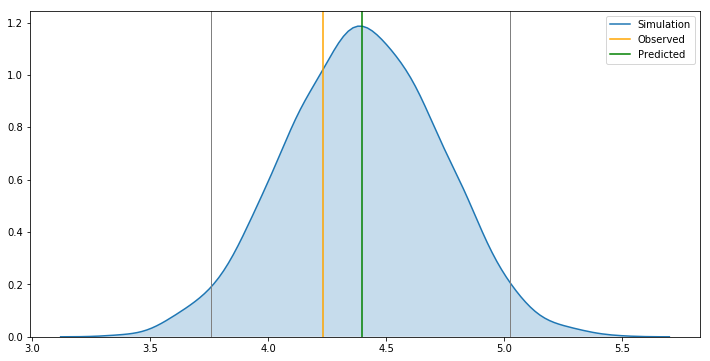

In [115]:
f, ax = plt.subplots(1, figsize=(12, 6))

sns.kdeplot(sims, shade=True, ax=ax, label='Simulation')
ax.axvline(db.loc[hid, 'l_price'], c='orange', label='Observed')
ax.axvline(model.fittedvalues[hid], c='green', label='Predicted')

lo, up = pd.Series(sims).sort_values().iloc[[int(np.round(0.025 * r)), int(np.round(0.975 * r))]]
ax.axvline(lo, c='grey', linewidth=1)
ax.axvline(up, c='grey', linewidth=1)

plt.legend()
plt.show()

To note:

- Intuition of the simulation
- The `for` loop, deconstructed
- The graph, bit by bit
- If we did this for every observation, we'd expect 95% to be within the 95% bands

**Exercise**

Explore with the code above and try to generate similar plots for:

- Different houses across locations and characteristics
- Different model

Now, we could do this for *all* the observations and get a sense of the overall distribution to be expected

In [116]:
%%time
# Parameters
## Number of observations & simulations
n = db.shape[0]
r = 200
# Specify model engine
model = m1

# Place-holder (N, r)
sims = np.zeros((n, r))
# Loop over number of replications
for i in range(r):
    # Get a random draw of betas
    rbs = np.random.normal(model.params, model.bse)
    # Get a random draw of epsilon
    re = np.random.normal([0]*n, model.scale)
    # Obtain point estimate
    y_hr = rbs[0] + np.dot(db[cols], rbs[1:]) + re
    # Store estimate
    sims[:, i] = y_hr

Wall time: 2.45 s


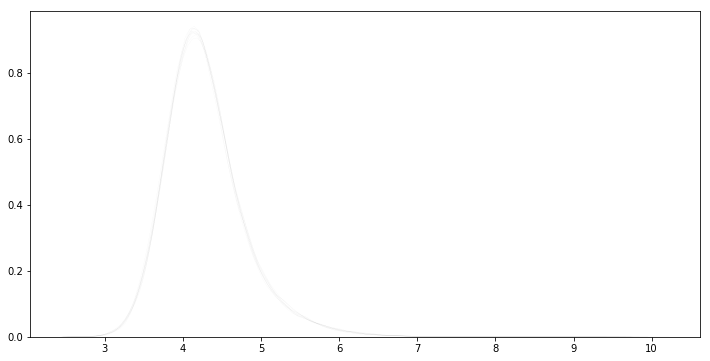

In [117]:
f, ax = plt.subplots(1, figsize=(12, 6))

for i in range(10):
    sns.kdeplot(sims[:, i], ax=ax, linewidth=0.1, alpha=0.1, color='k')
    
plt.show()

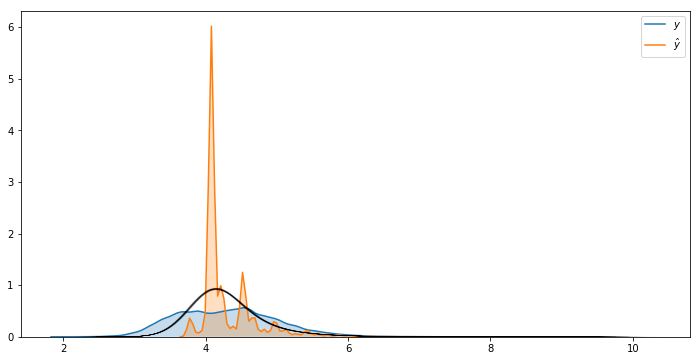

In [118]:
f, ax = plt.subplots(1, figsize=(12, 6))

sns.kdeplot(db['l_price'], shade=True, ax=ax, label='$y$')
sns.kdeplot(m1.fittedvalues, shade=True, ax=ax, label='$\hat{y}$')

for i in range(r):
    sns.kdeplot(sims[:, i], ax=ax, linewidth=0.1, alpha=0.1, color='k')
    
plt.show()

To note:

- Black line contains `r` thin lines that collectively capture the uncertainty behind the model

---

[Break]

---

### New data

Imagine we are trying to figure out how much should we charge for a property we want to put on AirBnb.

For example, let's assume our property is:

In [119]:
new = pd.Series({'bedrooms': 4,
                 'bathrooms': 1,
                 'beds': 8})

In [120]:
%%time
# Parameters
## Number of simulations
r = 2000
# Pull out characteristics for house of interest
x_i = new
# Specify model engine
model = m1

# Place-holder
sims = np.zeros(r)
# Loop over number of replications
for i in range(r):
    # Get a random draw of betas
    rbs = np.random.normal(model.params, model.bse)
    # Get a random draw of epsilon
    re = np.random.normal(0, model.scale)
    # Obtain point estimate
    y_hr = rbs[0] + np.dot(x_i, rbs[1:]) + re
    # Store estimate
    sims[i] = y_hr

Wall time: 787 ms


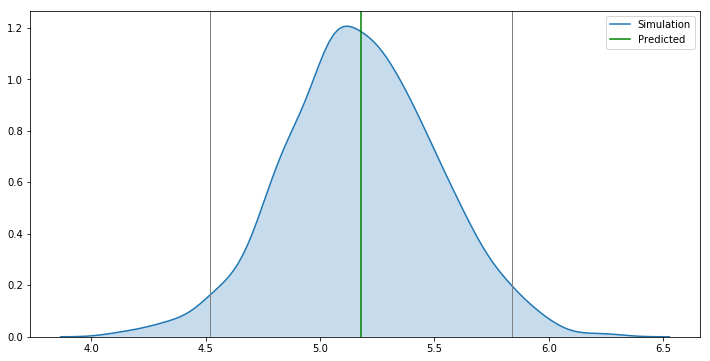

In [121]:
f, ax = plt.subplots(1, figsize=(12, 6))

sns.kdeplot(sims, shade=True, ax=ax, label='Simulation')
ax.axvline(model.params.iloc[0] + np.dot(new, model.params.iloc[1:]), \
           c='green', label='Predicted')

lo, up = pd.Series(sims).sort_values().iloc[[int(np.round(0.025 * r)), int(np.round(0.975 * r))]]
ax.axvline(lo, c='grey', linewidth=1)
ax.axvline(up, c='grey', linewidth=1)

plt.legend()
plt.show()

**[Pro]**

In [122]:
def predictor(bedrooms, bathrooms, beds):
    new = pd.Series({'bedrooms': bedrooms,
                     'bathrooms': bathrooms,
                     'beds': beds})
    r = 1000
    x_i = new
    model = m1
    #
    sims = np.zeros(r)
    for i in range(r):
        rbs = np.random.normal(model.params, model.bse)
        re = np.random.normal(0, model.scale)
        y_hr = rbs[0] + np.dot(x_i, rbs[1:]) + re
        sims[i] = y_hr
    f, ax = plt.subplots(1, figsize=(12, 6))
    ax.hist(sims, label='Simulation', alpha=0.25, bins=30)
    ax.axvline(model.params.iloc[0] + np.dot(new, model.params.iloc[1:]), \
               c='green', label='Predicted')
    lo, up = pd.Series(sims).sort_values().iloc[[int(np.round(0.025 * r)), int(np.round(0.975 * r))]]
    ax.axvline(lo, c='grey', linewidth=1, label='95% CI')
    ax.axvline(up, c='grey', linewidth=1)
    ax.set_xlim((0, 10))
    plt.legend()
    return plt.show()

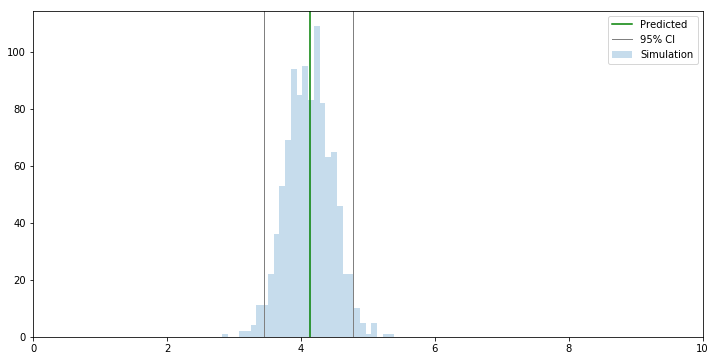

In [123]:
predictor(3, 1, 1)

In [124]:
# You might have to run this to make interactives work
# jupyter labextension install @jupyter-widgets/jupyterlab-manager
# From https://ipywidgets.readthedocs.io/en/latest/user_install.html#installing-the-jupyterlab-extension
# Then restart Jupyter Lab
from ipywidgets import interact, IntSlider

interact(predictor, bedrooms=IntSlider(min=1, max=10), \
                    bathrooms=IntSlider(min=0, max=10), \
                    beds=IntSlider(min=1, max=20));

interactive(children=(IntSlider(value=1, description='bedrooms', max=10, min=1), IntSlider(value=0, description='bathrooms', max=10), IntSlider(value=1, description='beds', max=20, min=1), Output()), _dom_classes=('widget-interact',))

## Model performance

To note:

- Switch from inference to prediction
- Overall idea of summarising model performance
- $R^2$
- Error-based measures

In [125]:
# R^2
r2 = pd.Series({'Baseline': metrics.r2_score(db['l_price'],
                                              m1.fittedvalues),
                'Augmented': metrics.r2_score(db['l_price'],
                                              m3.fittedvalues)})

MSE = model_selection.cross_val_score(LinearRegression(),
                                      db.iloc[rids, :][cols],
                                      db.iloc[rids, :]['l_price'],
                                      cv=5,
                                      scoring='mse')

r2

Augmented    0.603708
Baseline     0.330976
dtype: float64

In [126]:
# MSE
mse = pd.Series({'Baseline': metrics.mean_squared_error(db['l_price'],
                                                        m1.fittedvalues),
                 'Augmented': metrics.mean_squared_error(db['l_price'],
                                                         m3.fittedvalues)})
mse

Augmented    0.19385
Baseline     0.32726
dtype: float64

In [127]:
# MAE
mae = pd.Series({'Baseline': metrics.mean_absolute_error(db['l_price'],
                                                         m1.fittedvalues),
                 'Augmented': metrics.mean_absolute_error(db['l_price'],
                                                          m3.fittedvalues)})
mae

Augmented    0.335668
Baseline     0.457220
dtype: float64

In [128]:
# All
perf = pd.DataFrame({'MAE': mae,
                     'MSE': mse,
                     'R^2': r2})
perf

,MAE,MSE,R^2
Augmented,0.335668,0.19385,0.603708
Baseline,0.457220,0.32726,0.330976


## Overfitting & cross-validation

* *What*, *Why*, *When* overfitting
* Little data/lots of parameters --> *Mo* problems!
* What is cross-validation

In [129]:
# Split
x_train, x_test, y_train, y_test = model_selection.train_test_split(db[cols], 
                                                                    db['l_price'],
                                                                    test_size=0.2)

In [130]:
# Train
f = 'l_price ~ bedrooms + bathrooms + beds'
m1_tr = sm.ols(f, x_train.assign(l_price=y_train)).fit()

In [131]:
pd.DataFrame({'Full Dataset': m1.params,
              'Train Set': m1_tr.params})

,Full Dataset,Train Set
Intercept,3.613890,3.616187
bedrooms,0.291420,0.298863
bathrooms,0.025511,0.023787
beds,0.146588,0.140106


In [132]:
pd.Series({'Full Dataset': m1.rsquared,
              'Train Set': m1_tr.rsquared})

Full Dataset    0.330976
Train Set       0.331137
dtype: float64

In [133]:
# Test
test_pred = m1_tr.params['Intercept'] + \
            x_test.dot(m1_tr.params.drop('Intercept'))
pd.Series({'0-Full Dataset': m1.rsquared,
           '1-Train Set': m1_tr.rsquared,
           '2-Test Set': metrics.r2_score(y_test,
                                        test_pred)})

0-Full Dataset    0.330976
1-Train Set       0.331137
2-Test Set        0.330022
dtype: float64

To note:

* Use of `assign`
* $R^2$ increases with smaller train set, but decreases with testing (not much, which is good! why? Already regularised)

In [145]:
rids = np.arange(db.shape[0])
np.random.shuffle(rids)
r2s = model_selection.cross_val_score(LinearRegression(),
                                      db.iloc[rids, :][cols],
                                      db.iloc[rids, :]['l_price'],
                                      cv=5,
                                      scoring='r2')
print(r2s)
r2s.mean()

[0.32645041 0.33548747 0.33789322 0.32112627 0.33213165]


0.3306178035562174

Just for the fun of it, let's replicate without reshufling IDs:

In [146]:
r2s = model_selection.cross_val_score(LinearRegrbession(),
                                      db[cols],
                                      db['l_price'],
                                      cv=5,
                                      scoring='r2')
print(r2s)
r2s.mean()

[ 0.16449518  0.34920339 -0.10119646  0.27579852  0.2976514 ]


0.19719040585934597

In [148]:
MAE = model_selection.cross_val_score(LinearRegression(),
                                      db.iloc[rids, :][cols],
                                      db.iloc[rids, :]['l_price'],
                                      cv=5,
                                      scoring='mae')

ValueError: 'mae' is not a valid scoring value. Valid options are ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']

To note:

* What's happened?
* The i.i.d. assumption
* Structure in the data that is not incorporated
* How is CV affected?

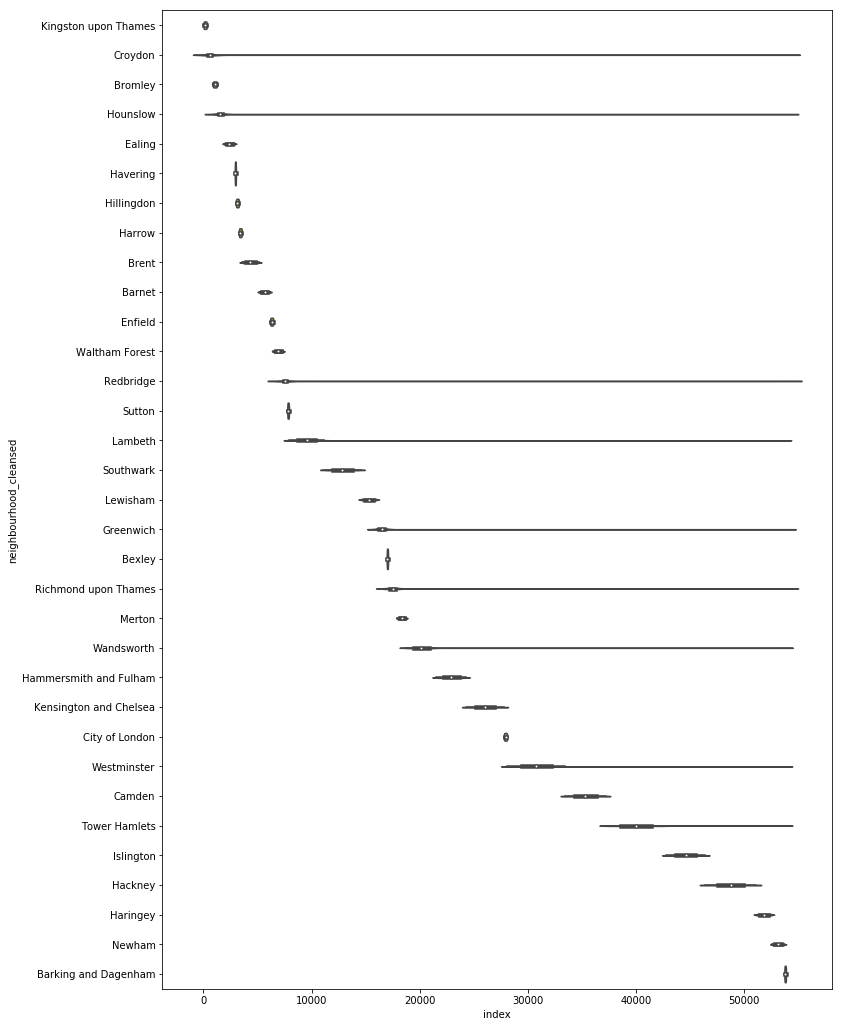

In [136]:
f, ax = plt.subplots(1, figsize=(12, 18))
sns.violinplot(x='index', 
               y='neighbourhood_cleansed', 
               data=db_all.reset_index(),
               ax=ax);

To note:

* Spatial heterogeneity
* More generally, group membership

## More advanced predictive methods: the Random Forest

In [137]:
m4 = RandomForestRegressor().fit(db[cols], db['l_price'])\
                            .predict(db[cols])

To note:

* First `fit`, then `predict` using the same features
* No `params` here because it's a much more flexible functional form

In [138]:
rf = pd.Series({'R^2': metrics.r2_score(db['l_price'], m4), 
                'MSE': metrics.mean_squared_error(db['l_price'], m4),
                'MAE': metrics.mean_absolute_error(db['l_price'], m4)})
pd.concat([perf, 
           pd.DataFrame({'RF': rf}).T])

,MAE,MSE,R^2
Augmented,0.335668,0.193850,0.603708
Baseline,0.457220,0.327260,0.330976
RF,0.396771,0.255988,0.476679


To note:

* Use of `concat`
* Performance comparison

But...

In [139]:
m4_cv = RandomForestRegressor().fit(x_train, y_train)\
                               .predict(x_test)

In [141]:
rf_cv = pd.Series({'R^2': metrics.r2_score(y_test, m4_cv), 
                'MSE': metrics.mean_squared_error(y_test, m4_cv),
                'MAE': metrics.mean_absolute_error(y_test, m4_cv)})
pd.concat([perf, 
           pd.DataFrame({'RF': rf}).T,
           pd.DataFrame({'RF-CV': rf_cv}).T])

,MAE,MSE,R^2
Augmented,0.335668,0.193850,0.603708
Baseline,0.457220,0.327260,0.330976
RF,0.396771,0.255988,0.476679
RF-CV,0.399259,0.262657,0.461876


To note:

* `m4_cv` fits on train, predicts on test
* Comparison RF Vs RF-CV

**Exercise**

* [Pro] Replicate the table above based on average values of several train-test splits

In [143]:
rf_cv = pd.Series({'R^2': metrics.r2_score(y_test, m4_cv), 
                'MSE': metrics.mean_squared_error(y_test, m4_cv),
                'MAE': metrics.mean_absolute_error(y_test, m4_cv)})

pd.concat([perf,
           pd.DataFrame({'RF': rf}).T,
           pd.DataFrame({'RF-CV': rf_cv}).T])

,MAE,MSE,R^2
Augmented,0.335668,0.193850,0.603708
Baseline,0.457220,0.327260,0.330976
RF,0.396771,0.255988,0.476679
RF-CV,0.399259,0.262657,0.461876
